## Import the relevant libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [60]:
data = pd.read_csv('3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


# Cluster based on coordinates



## Plot the data

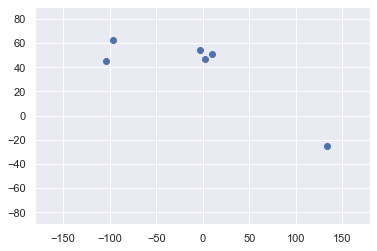

In [5]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

## Select the features

In [11]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

In [34]:
kmeans = KMeans(3)

In [35]:
kmeans.fit(x)

KMeans(n_clusters=3)

## Getting predicted clusters

In [36]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 0, 0, 2])

### Adding the identified clusters to the dataset

In [37]:
data_with_clusters = data.copy()
data_with_clusters["Clusters"] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


## Plotting the data

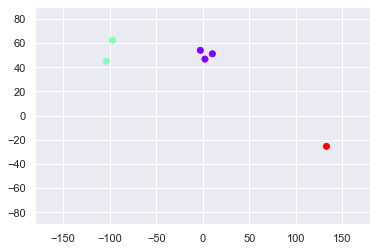

In [38]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

# Cluster based on language

## Map the language data

In [61]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French': 1, 'German': 2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Select the features

In [69]:
x = data_mapped.iloc[:, 3:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


## Clustering

In [70]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

## Getting predicted values

In [71]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 2, 2, 1])

### Adding the identified clusters to the dataset

In [72]:
data_with_clusters = data_mapped.copy()
data_with_clusters["Clusters"] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,2
4,Germany,51.15,10.40,2,2
5,Australia,-25.45,133.11,0,1


## Plot the data (Language - based cluster)

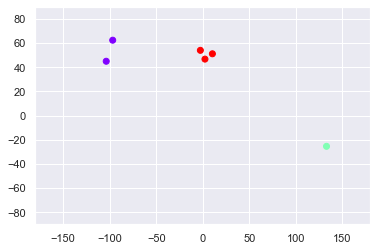

In [73]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

## Select the right number of clusters

### WCSS

#### Getting the WCSS for the last problem

In [74]:
kmeans.inertia_

290.10523333333333

#### Finding the right WCSS

In [75]:
wcss = []

for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_itter = kmeans.inertia_
    wcss.append(wcss_itter)

wcss

C:\Users\alexm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]